# ARTIFICAL NEURAL NETWORKS

Artifical Neural Networks Nedir?

Öncesinde ANN' i bir hatırlayalım. ANN Logistic Regresyon'a hidden layerlar eklenmesi ile meydana gelir. ANN birçok nöron adı verilen işlem birimlerinin meydana gelmesiyle oluşur. Her bir nöron girdi sinyalleri alır ve bu sinyalleri ağırlaklarla çarpar ve ardından bir aktivasyon fonksiyonu (tanh, sigmoid, relu, elu) içine girip bir çıktı değeri oluşturur. Bu çıktı değeri diğer nöronlara girdi olmaya aday oluyor. 


ANN eğitimi girdi verileri kullanılarak nöronlarda ağırlıkların (katsayıların, weight) değerlerinin optimize edilmesiyle gerçekleştirir. Bu işlem backward propagation (geriyayılım) adlı işlemle gerçekleştirilir. Backward Propagation algoritması, önceden belirlenmiş bir hedef çıktıya göre ağırlıkların nasıl güncellenmesiyle ilgilenir. Bu adım ağırlıkların optimizasyonu ile sonlanır ve model için en iyi en optimize değerler seçilir.

ANN çeşitli uygulamalarda kullanılabilir. Örneğin sınıflandırma, tahmin, veri kümesi gruplama gibi birçok problemde kullanılabilir. Ayrıca, derin öğrenme tekniklerinin temelini oluşturur ve bu nedenle görüntü tanıma, doğal dil işleme ve oyun stratejileri gibi birçok karmaşık görevde başarılı sonuçlar vermiştir.

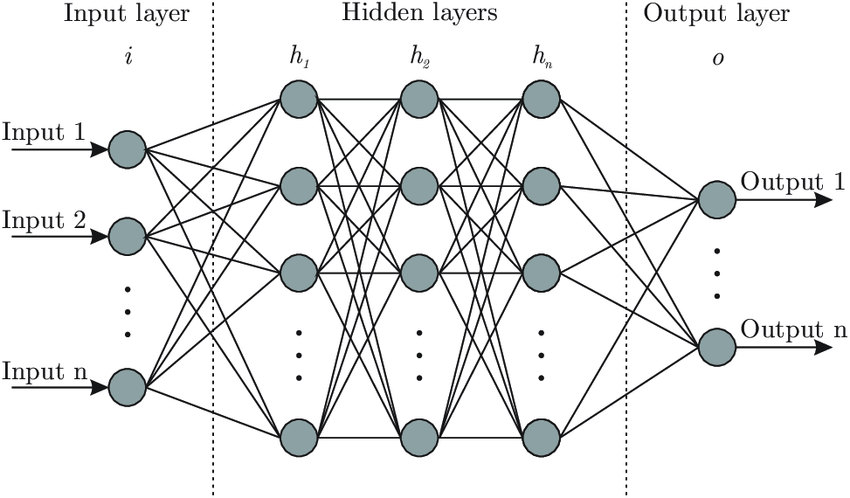

ANN' i hatırladığımıza göre şimdi PyTorch ile nasıl implemet edilidiğine ve adımlarına beraber bakalım!

Logistic Regresyon iyiydi fakat modelin karmaşıklığı arttıkça ne yazık ki yeterli olmuyor. Bu sebeple Artifical Neural Network kullanacağız. Yanı modelimizi non linaeritysini arttıracağız. Zaten Logistic Regresyon’a hidden layer eklersek bu bir Artifical Neural Network haline gelir.
Adımlarımız:
1.	Import Libraries

2.	Prepare Dataset

3.	Create ANN model

4.	Instantiate Model Class

5.	Instantiante Loss Class

6.	Instantiante Optimizer Class

7.	Training the Model

8.	Prediction


In [2]:
# Import Libraries
import torch
import numpy as np
import torch.nn as nn
from torch.autograd import Variable  #Gradient hesabı yapacağımız için Variable'lere ihtiyaç vardır.
from torch.utils.data import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Gradient hesabı yapılıp, bunlar accumulate edileceği için "from torch.autograd import Variable" satırı ile Variable tanımlanmıştır.



Aşağıda gerçekleştirelen işlemler nelerdir?

Öncesinde "train.csv" dosyasını yükleyip "train" adlı değişkene atarız.


Veri setini target ve feature olarak ayırdık. train["label"] değişkenini "targets_numpy" adlı değişkene atadık. "label"değişkeni hariç olan tüm özellikleri ise "features_numpy" adlı değişkene atadık. ve elimizdeki değişkenler image olduğu için 0-255 arasında değerler olduğu /255 bölümp normalize ediyoruz.


targets_numpy = train.label.values

features_numpy = train.loc[:,train.columns != "label"].values/255 





Ardından hem features'ların olduğu hem de target'ların olduğu veriseti %20 ye %80 ayırıyoruz.


features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,targets_numpy, test_size = 0.2,random_state = 42) 





PyTorch'da implement işlemi yaptığımız için her iki array'i Tensor'a çeviriyoruz.

featuresTrain = torch.from_numpy(features_train)

targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

featuresTest = torch.from_numpy(features_test)

targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long


BatchSize ve epoch 'ları belirtip 

batch_size = 100

n_iters = 10000

num_epochs = n_iters / (len(features_train) / batch_size)

num_epochs = int(num_epochs)



Bu adımlar, PyTorch'un veri yükleyicilerini kullanarak verileri yükleme, işleme ve düzenleme sürecini gerçekleştirmek için yapılmaktadır.İlk olarak "TensorData" sınıfı , özellik tensörü ve hedef tensöründen oluşan bir veri kümesi oluşturur. Bu veri kümesi daha sonra ""DataLoader" sınıfına aktarılır. "DataLoader" sınıfı, veri kümesindeki örnekleri önceden belirlenmiş bir "batch_size" değerine göre belirlenen mini gruplar haline ayrılır. Ayrıca verilerin karşıtırılıp karıştırılmayacağı shuffle="False" değeri verilir. 


Bu adımların gerçekleştirilmesinin nedeni veri kümesini daha iyi yönetmek, bellek verimliliğini arttırmak ve eğitim işlemlerinin hızını arttırılmasını sağlamaktır. DataLoader sınıfı, verileri otomatik olarak GPU'ya taşımak gibi diğer işlemleri de yapabilir, bu nedenle PyTorch kullanarak model eğitimini daha verimli hale getirebiliriz.
 

train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)

test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)

test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)



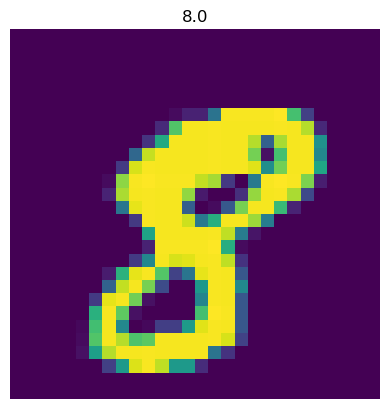

In [3]:
# Prepare Dataset
# load data
train = pd.read_csv("train.csv",dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,targets_numpy, test_size = 0.2,random_state = 42) 
                                                                            
                                                                            
                                                                             

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

1. Öncesinde bir ANNModel yaratalım ve bunu nn.Module'den inheritance ediyoruz. nn.Module sınıfından türüyor. Bu sınıfın bir yapay sinir ağı olacağını ve PyTorch tarafından sağlanan bazı özellikleri kullanacağını gösterir.


2. def __init__(self, input_dim, hidden_dim, output_dim): Constructor methodunu tanımlanıyor. Constructor, sınıfın özelliklerini (katmanlar) tanımlamak için  kullanılır.

3. super(ANNModel, self).__init__(): Bu üst sınıfın constructoru çağırılarak devralınılan özellikleri (burada nn.Module özellikleri) başlatır.

4. self.fc1 = nn.Linear(input_dim, hidden_dim):  İlk tam bağlantılı katman (fully-connected layer) oluşturuluyor. Bu katman, girdi boyutunu (burada 28*28=784) ve gizli katman boyutunu (hidden_dim) alır.

5. self.relu1 = nn.ReLU(): ReLU (Rectified Linear Unit) aktivasyon fonksiyonu tanımlanıyor. Bu fonksiyon non-linearity 'yi arttırır. 

6. self.fc2 = nn.Linear(hidden_dim, hidden_dim) : inci tam bağlantılı katman oluşturuluyor.u katman, girdi ve çıktı boyutlarının her ikisi de gizli katman boyutuna (hidden_dim) sahiptir.

7. self.tanh2 = nn.Tanh() :Hiperbolik tanjant (tanh) aktivasyon fonksiyonu tanımlanıyor. Bu fonksiyon da doğrusal olmayanlığı (non-lineariy) eklemek için kullanılır.

8. self.fc3 = nn.Linear(hidden_dim, hidden_dim) : Üçüncü tam bağlantılı katman oluşturuluyor.

9. self.elu3 = nn.ELU() : ELU (Exponential Linear Unit) aktivasyon fonksiyonu tanımlanıyor.

10. self.fc4 = nn.Linear(hidden_dim, output_dim) :  Çıkış katmanı oluşturuluyor. Bu katman, gizli katman boyutunu ve çıktı boyutunu (burada 10, rakamların sınıflandırılması için) alır.

11. def forward(self, x): ileri besleme işlemi tanımlanıyor. Bu metot, veri akışını belirleyerek sinir ağının çıktısını hesaplar. return çıktıdır.

12. out = self.fc1(x): output elde ediliyor.

13. input_dim = 28*28

    output_dim = 10
    
    hidden_dim = 150
    
    Burada boyutlarımızı giriyoruz. Hidden layer boyutunu 150 belirledik. Bunun bir sebebi yok herhangi bir değer olarak da belirlenebilir.
    
14. model = ANNModel(input_dim, hidden_dim, output_dim) ===> Modelimizi çağırdık.

15. error = nn.CrossEntropyLoss() ===> çoklu sınıflandırmada çokca kullanılan bir LossFonksiyonu olarak CrossEntropyLoss() fonksiyonunu kullandık.

16. learning_rate = 0.02

    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    Optimizer değerlerin optimize edilmesi için çağırdığımız fonksiyon.



In [4]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    #Katmanları bağlama işlemi forward metodunun içerisinde yapılır.
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Geldik modelin eğitimine, hem belirli iterasyonda doğruluk değerlerini kayıp değerlerini ve iterasyonsayılarını tutmak istiyoruz. Bu sebeple önceklikli olarak boş listeler tanımladık ve bir counter değeri tanımladık.

Ardından artık iteratif olarak öğrenme işlemine geçtik. Belirtilen num_epochs sayısı kadar dögüye girilir. Bu, tüm eğitim veri setinin kaç kez modelde eğitileceğini belirleyen bir hiper parametredir.

Döngünün her adımda "train_loader"'dan toplu bir parça veri alınır. Buna batch deniyor. Modelde beslenir.

Train değişkeni ve images değişkeni yeniden şekillendirilerek oluşturulur. 

train = Variable(images.view(-1, 28*28)) ====>  Bunları da Variable değeri içinde saklıyoruz. 


labels = Variable(labels)====> Label değişkenini de Variable değişkeni içine atadık.


optimizer.zero_grad() ===> Gradientler sıfırlanır.Daha önce hesaplanmış olan gradientlerin silinmesi gerektiği için, optimizer nesnesi ile bağlantılı olan model nesnesinin gradientlerini sıfırlamak için zero_grad() yöntemi kullanılır.

outputs = model(train)===> Modelin "train" girdisi için çıktısı hesaplanır.

Softmax ve Cross Entropy Loss Hesaplama: Modelin çıktsı "CrossEntropyLoss" fonksiyonuna beslenir ve "loss" değişkenindeki kaybı hesaplarız.

Geriye doğru yayılım (Backward Propagation): loss'un gradyanı hesaplanır.

Parametrelerin Güncellenmesi: optimizer nesnesi kullanılarak, modelin parametreleri güncellenir.

count değişkeni 1 artırılır.

accuracy değişkeni hesaplanır.

loss, iteration ve accuracy değerleri, ayrı ayrı listelere eklenir.

Eğer count 500 ile tam bölünürse, kayıp (loss) ve doğruluk (accuracy) yazdırılır.
                 

In [5]:
# ANN model training
count = 0 #her 50 adımda bir loss ve accuracy değerleri print ettirilecek.
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.8066689968109131  Accuracy: 77.05952453613281 %
Iteration: 1000  Loss: 0.4923432469367981  Accuracy: 86.92857360839844 %
Iteration: 1500  Loss: 0.2302836924791336  Accuracy: 89.33333587646484 %
Iteration: 2000  Loss: 0.305990993976593  Accuracy: 90.48809814453125 %
Iteration: 2500  Loss: 0.3141155540943146  Accuracy: 91.83333587646484 %
Iteration: 3000  Loss: 0.1288834661245346  Accuracy: 92.61904907226562 %
Iteration: 3500  Loss: 0.23556511104106903  Accuracy: 93.4047622680664 %
Iteration: 4000  Loss: 0.0691676214337349  Accuracy: 93.95237731933594 %
Iteration: 4500  Loss: 0.29432037472724915  Accuracy: 94.52381134033203 %
Iteration: 5000  Loss: 0.11232677102088928  Accuracy: 94.6547622680664 %
Iteration: 5500  Loss: 0.1961219757795334  Accuracy: 94.85713958740234 %
Iteration: 6000  Loss: 0.18054763972759247  Accuracy: 95.14286041259766 %
Iteration: 6500  Loss: 0.09081516414880753  Accuracy: 95.48809814453125 %
Iteration: 7000  Loss: 0.11693695187568665  Accura

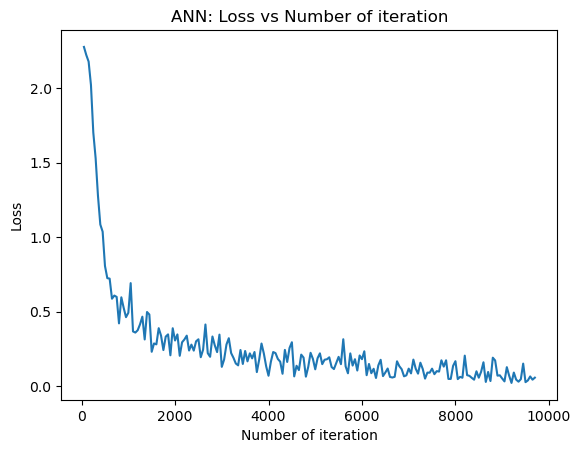

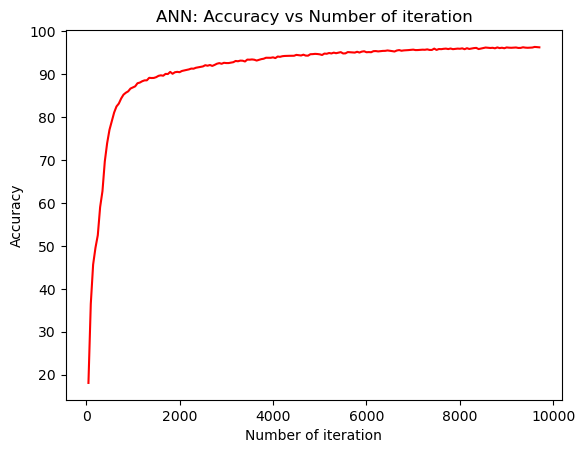

In [6]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()